### <span style="color:blue"> STUDENT MARKS PREDICTION </span>
#### <span style="color:blue"> To create a Machine Learning Model that predicts Student Marks using Scikit-learn, you'll need a dataset with features that could influence the students' marks, such as study hours,etc. You can use regression models to predict the marks since they are continuous values.</span>

#### <span style="color:blue"> Here's a step-by-step guide to building a simple machine learning model using Scikit-learn: </span>
#### <span style="color:blue">  First, you need to install/import Scikit-learn, Pandas, and Matplotlib (for data visualization). </span>

In [105]:
#importing the librarier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### <span style="color:darkgreen">  Prepare/Load the Student Dataset </span>
#### <span style="color:darkgreen"> Assume you have a dataset where the independent variables (features) are study hours (X) etc., and the dependent variable (target) is the Student Exam Marks (Y).</span>

In [4]:
_StudDF = pd.read_csv(r'D:\Python_Code\CSVData\Student_Marks_Info.csv')
_StudDF

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [5]:
#displays the first 5 rows from the dataframe object
_StudDF.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [6]:
#displays the last 5 rows from the dataframe object
_StudDF.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [7]:
print('The Student Data Set consists of',_StudDF.shape[0],'rows and',_StudDF.shape[1],'columns.')

The Student Data Set consists of 200 rows and 2 columns.


In [8]:
_StudDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [9]:
_StudDF.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
_StudDF.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


### <span style="color:maroon"> Visualize the Dataset through plots </span>

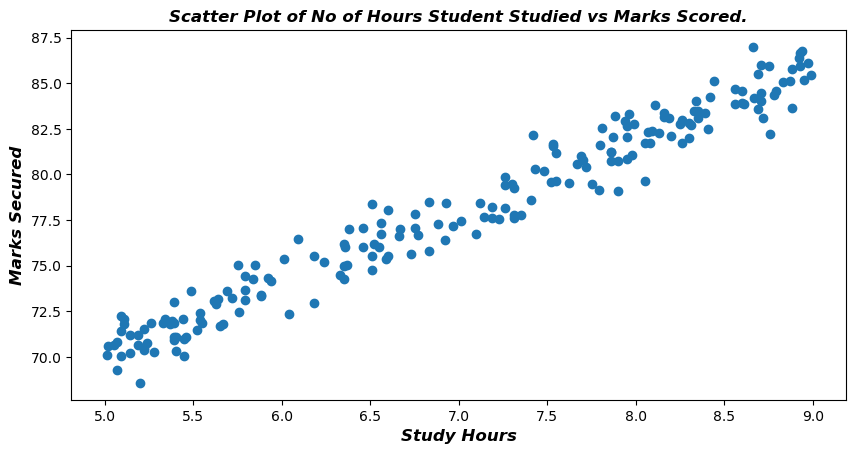

In [12]:
plt.figure().set_figwidth(10)
plt.scatter(x=_StudDF['study_hours'],y=_StudDF['student_marks'])
plt.xlabel('Study Hours',fontsize='large',fontweight='bold', style='italic', loc='center')
plt.ylabel('Marks Secured',fontsize='large',fontweight='bold', style='italic', loc='center')
plt.title('Scatter Plot of No of Hours Student Studied vs Marks Scored.',fontsize='large',fontweight='bold', style='italic', loc='center')
plt.show()

## <span style="color:maroon"> Data Cleaning</span>

In [14]:
_StudDF.isna().sum()

study_hours      5
student_marks    0
dtype: int64

#### <span style="color:red">Insight:  study_hours column has 5 null values hence replace the null values using mean.</span>

In [16]:
_StudDF.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [17]:
_StudDF['study_hours'].mean()

6.9959487179487185

In [18]:
_StudDF.isna().sum()

study_hours      5
student_marks    0
dtype: int64

In [35]:
St_Hrs_Mean = _StudDF['study_hours'].mean()
_StudDF = _StudDF.fillna({'study_hours': St_Hrs_Mean})

In [43]:
_StudDF.isna().sum()

study_hours      0
student_marks    0
dtype: int64

In [41]:
_StudDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


# <span style="color:maroon"> Split the Clean Data into Training and Testing sets </span>
#### <span style="color:maroon"> Scikit-learn provides a train_test_split function that splits the data into training and test sets. <br/><br/> This is important for evaluating the model's performance. </span>

In [89]:
X = _StudDF.drop("student_marks", axis = "columns")
y = _StudDF.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=0)

In [93]:
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [97]:
model.fit(X_train,y_train) 

LinearRegression()

In [99]:
model.coef_

array([[3.93037294]])

In [103]:
model.intercept_ #c

array([50.45063632])

In [107]:
m = np.round(model.coef_,2)
c = np.round(model.intercept_,2)
y  = m * 11 + c 
y

array([[93.68]])

In [116]:
np.round(model.predict([[11]]),2)

C:\Users\manik\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[93.68]])

### <span style="color:maroon"> Once the model is trained, you can evaluate it using the test data and calculate the accuracy or performance metrics like Mean Squared Error (MSE). </span>

In [129]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target variable (marks) for the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {np.round(mse,2)}")
print(f"R-squared: {np.round(r2,2)}")

Mean Squared Error: 1.04
R-squared: 0.95


In [118]:
y_pred  = model.predict(X_test)
y_pred

array([[83.50507271],
       [70.84927186],
       [72.93236952],
       [85.35234799],
       [73.20749562],
       [84.48766595],
       [80.12495199],
       [81.85431608],
       [80.91102657],
       [82.20804964],
       [78.98514384],
       [84.84139951],
       [77.84533568],
       [77.68812077],
       [83.22994661],
       [85.78468901],
       [84.9593107 ],
       [72.61793968],
       [78.71001773],
       [79.18166248],
       [84.2911473 ],
       [85.6274741 ],
       [74.74034107],
       [81.3433676 ],
       [72.02838374],
       [80.40007809],
       [78.98514384],
       [82.09013845],
       [77.94732382],
       [82.24735337],
       [75.44780819],
       [84.60557713],
       [71.63534645],
       [75.48711192],
       [70.29901965],
       [78.98514384],
       [75.32989701],
       [84.52696967],
       [74.07217767],
       [71.4388278 ]])

In [120]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.410000,82.50,83.505073
1,5.190000,71.18,70.849272
2,5.720000,73.25,72.932370
3,8.880000,83.64,85.352348
4,5.790000,73.64,73.207496
5,8.660000,86.99,84.487666
6,7.550000,81.18,80.124952
7,7.990000,82.75,81.854316
8,7.750000,79.50,80.911027
9,8.080000,81.70,82.208050


### <span style="color:maroon">  Fine-tune your model </span>

In [132]:
model

LinearRegression()

In [134]:
model.score(X_test,y_test) 

0.9521841793508594

In [136]:
model.score(X_train,y_train)

0.9584528455152638

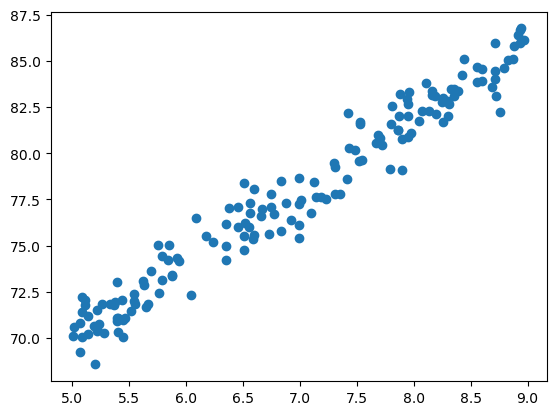

In [138]:
plt.scatter(X_train,y_train) 
plt.show()

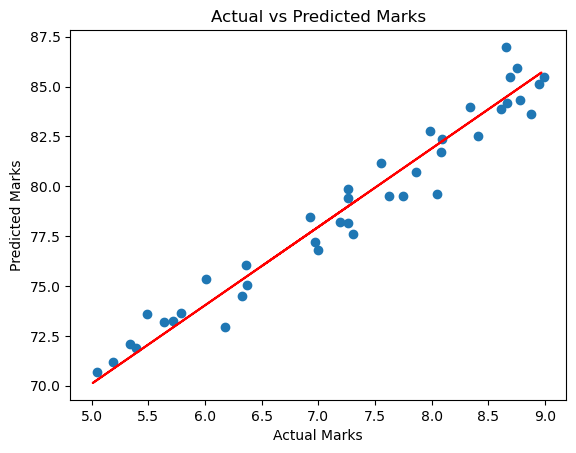

In [144]:
plt.scatter(X_test, y_test)
plt.plot(X_train, model.predict(X_train), color = "r")
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.show()

### <span style="color:maroon">Save the Predicted Model by creating a Pickel file using Joblib library and saving the pickel file in a directory.</span>

In [149]:
import joblib # create pipeline 


In [151]:
joblib.dump(model, r"D:\Python_Code\Student_Marks_Prediction\PredictMarks.pkl")

['D:\\Python_Code\\Student_Marks_Prediction\\PredictMarks.pkl']

### <span style="color:maroon">Call the pickel file and evaluate the Marks by passing No of hrs studied.</span>

In [160]:
modelMarksPredict = joblib.load(r"D:\Python_Code\Student_Marks_Prediction\PredictMarks.pkl")

In [166]:
modelMarksPredict.predict([[8.41]])

C:\Users\manik\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[83.50507271]])